In [1]:
#Dataset 
#https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#used to show the plot without writing plot.show
import seaborn as sns

In [2]:
train_df = pd.read_excel("Data_Train.xlsx")

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df= pd.read_excel("Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
final_df=train_df.append(test_df)


In [6]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [7]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
#Feature engineering

In [9]:
#Handling Date
final_df["Date"] = final_df["Date_of_Journey"].str.split('/')

In [10]:
final_df["Date"] = final_df["Date_of_Journey"].str.split('/').str[0]

In [11]:
final_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6


In [12]:

final_df ["Month"]= final_df["Date_of_Journey"].str.split('/').str[1]
final_df ["Year"]=final_df["Date_of_Journey"].str.split('/').str[2]

In [13]:
# #we can also use lambda function
# df["Date"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
# df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
# df["Year"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[2])

In [14]:
final_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,06,2019
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,03,2019
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,03,2019
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,03,2019


In [15]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [17]:
final_df.describe()

,Price,Date,Month,Year
count,10683.000000,13354.000000,13354.000000,13354.0
mean,9087.064121,13.389846,4.710574,2019.0
std,4611.359167,8.439060,1.165622,0.0
min,1759.000000,1.000000,3.000000,2019.0
25%,5277.000000,6.000000,3.000000,2019.0
50%,8372.000000,12.000000,5.000000,2019.0
75%,12373.000000,21.000000,6.000000,2019.0
max,79512.000000,27.000000,6.000000,2019.0


In [18]:
final_df.drop(["Date_of_Journey"], axis =1 , inplace=True)

In [19]:
final_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019


In [20]:
final_df["Arrival_Time"].str.split(" ")

0       [01:10, 22, Mar]
1                [13:15]
2       [04:25, 10, Jun]
3                [23:30]
4                [21:35]
              ...       
2666    [20:25, 07, Jun]
2667             [16:55]
2668    [04:25, 07, Mar]
2669             [19:15]
2670             [19:15]
Name: Arrival_Time, Length: 13354, dtype: object

In [21]:
final_df["Arrival_Time"].str.split(" ").str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [22]:
#again with lambda func
final_df["Arrival_Time"]= final_df["Arrival_Time"].apply(lambda x:x.split(" ")[0])

In [23]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [24]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]

In [25]:
final_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23h 55m,1 stop,No info,NaN,6,6,2019,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6h 35m,1 stop,No info,NaN,6,3,2019,04,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019,19,15


In [26]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)

In [27]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [28]:
final_df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [29]:
final_df['Dept_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dept_min']=final_df['Dep_Time'].str.split(':').str[1]
final_df['Dept_hour']=final_df['Dept_hour'].astype(int)
final_df['Dept_min']=final_df['Dept_min'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace=True)

In [30]:
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dept_hour        13354 non-null  int32  
 14  Dept_min         13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [31]:
final_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [32]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [33]:
final_df.drop('Route', axis =1, inplace = True)

In [34]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [35]:
final_df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dept_hour        13354 non-null  int32  
 13  Dept_min         13354 non-null  int32  
dtypes: float64(2), int32(7), object(5)
memory usage: 1.2+ MB


In [37]:
final_df["Duration_hour"] = final_df["Duration"].str.split("h").str[0]

In [38]:
final_df["Duration_hour"]

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_hour, Length: 13354, dtype: object

In [39]:
final_df["Duration_minute"] = final_df["Duration"].str.split("h").str[1]

In [40]:
final_df["Duration"].str.split(" ")

0        [2h, 50m]
1        [7h, 25m]
2            [19h]
3        [5h, 25m]
4        [4h, 45m]
           ...    
2666    [23h, 55m]
2667     [2h, 35m]
2668     [6h, 35m]
2669    [15h, 15m]
2670    [14h, 20m]
Name: Duration, Length: 13354, dtype: object

In [41]:
final_df["Duration"].str.split(" ").str[1]

0       50m
1       25m
2       NaN
3       25m
4       45m
       ... 
2666    55m
2667    35m
2668    35m
2669    15m
2670    20m
Name: Duration, Length: 13354, dtype: object

In [42]:
final_df["Duration"].str.split(" ").str[0]

0        2h
1        7h
2       19h
3        5h
4        4h
       ... 
2666    23h
2667     2h
2668     6h
2669    15h
2670    14h
Name: Duration, Length: 13354, dtype: object

In [43]:
final_df["Duration"].str.split("h").str[0]

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration, Length: 13354, dtype: object

In [44]:
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50m
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25m
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25m
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,23,55m
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,2,35m
2668,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,6,35m
2669,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,15,15m


In [45]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

In [46]:
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50m
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25m
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25m
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,23,55m
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,2,35m
2668,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,6,35m
2669,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,15,15m


In [47]:
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50m
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25m
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25m
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,23,55m
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,2,35m
2668,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,6,35m
2669,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,15,15m


In [48]:
final_df["Duration_hour"] = final_df["Duration_hour"].astype(int)

In [49]:
final_df["Duration_hour"] = final_df["Duration_hour"] *60

In [50]:
final_df["Duration_hour"]

0        120
1        420
2       1140
3        300
4        240
        ... 
2666    1380
2667     120
2668     360
2669     900
2670     840
Name: Duration_hour, Length: 13351, dtype: int32

In [51]:
final_df["Duration_minute"] = final_df["Duration_minute"].str.split("m").str[0]

In [52]:
final_df["Duration_minute"]

0        50
1        25
2          
3        25
4        45
       ... 
2666     55
2667     35
2668     35
2669     15
2670     20
Name: Duration_minute, Length: 13351, dtype: object

In [53]:
final_df["Duration_minute"] =final_df["Duration_minute"].fillna(0)

In [54]:
final_df["Duration_minute"].head()

0     50
1     25
2       
3     25
4     45
Name: Duration_minute, dtype: object

In [55]:
# Extracting Duration hours and duration minutes 

final_df['Duration_hour' ] = final_df['Duration'].str.replace('h','').str.replace('m' , '').str[0: ].str.split(' ' , expand = True )[0].fillna(0).astype('int32')
final_df['Duration_min' ] = final_df['Duration'].str.replace('h','').str.replace('m' , '').str[0: ].str.split(' ' , expand = True )[1].fillna(0).astype('int32')

In [56]:
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour,Duration_minute,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50,50
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25,25
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,,0
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25,25
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,23,55,55
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,2,35,35
2668,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,6,35,35
2669,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,15,15,15


In [57]:
#calculation total duration hours 
final_df['total_hours'] = final_df['Duration_hour'] + final_df['Duration_min'] / 60  

In [58]:
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour,Duration_minute,Duration_min,total_hours
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50,50,2.833333
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25,25,7.416667
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,,0,19.000000
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25,25,5.416667
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45,45,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,23,55,55,23.916667
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,2,35,35,2.583333
2668,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,6,35,35,6.583333
2669,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,15,15,15,15.250000


In [59]:
final_df.drop(["Duration_hour"], axis =1 , inplace=True)
final_df.drop(["Duration_minute"], axis=1, inplace= True)
final_df.drop(["Duration_min"], axis=1, inplace= True)

In [60]:
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,total_hours
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2.833333
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7.416667
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19.000000
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5.416667
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,23.916667
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,2.583333
2668,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,6.583333
2669,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,15.250000


# Handling duplicate values

In [61]:
final_df.duplicated().sum()

249

In [62]:
final_df.drop_duplicates(inplace=True)

In [63]:
final_df["Airline"].value_counts()

Jet Airways                          4585
IndiGo                               2552
Air India                            2124
Multiple carriers                    1539
SpiceJet                             1023
Vistara                               606
Air Asia                              404
GoAir                                 239
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:>

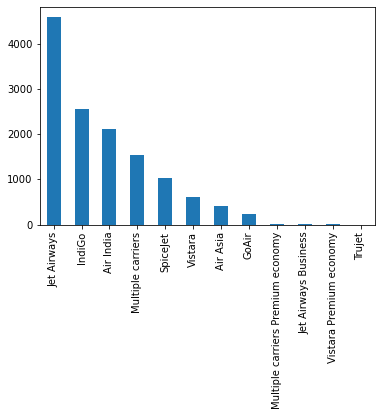

In [64]:
final_df['Airline'].value_counts().plot(kind = 'bar') 

Delhi       5471
Kolkata     3567
Banglore    2727
Mumbai       881
Chennai      456
Name: Source, dtype: int64


<AxesSubplot:>

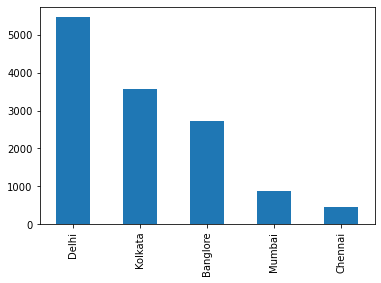

In [65]:
print(final_df['Source'] .value_counts())
final_df['Source'].value_counts().plot(kind = 'bar') 

Cochin       5471
Banglore     3567
Delhi        1582
New Delhi    1145
Hyderabad     881
Kolkata       456
Name: Destination, dtype: int64


<AxesSubplot:>

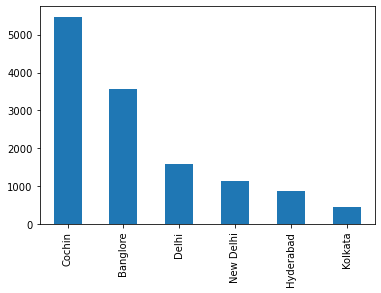

In [66]:
print(final_df['Destination'] .value_counts())
final_df['Destination'].value_counts().plot(kind = 'bar') 

<AxesSubplot:>

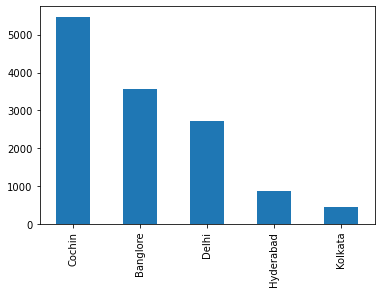

In [67]:
final_df['Destination'] = final_df['Destination'].replace('New Delhi' , 'Delhi')
final_df['Destination'].value_counts().plot(kind = 'bar') 

# Outliars

<AxesSubplot:ylabel='Density'>

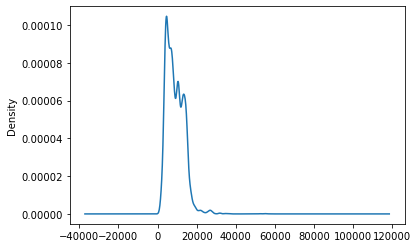

In [68]:
final_df['Price'].plot(kind = 'kde') 

<AxesSubplot:xlabel='Price'>

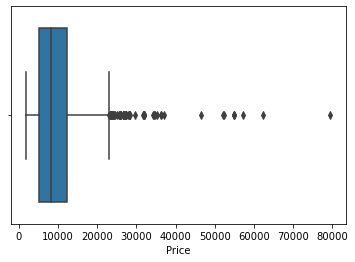

In [69]:
sns.boxplot(x = 'Price' , data = final_df) 

In [70]:
final_df.describe() 

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,total_hours
count,13101.000000,10459.000000,13102.000000,13102.000000,13102.0,13102.000000,13102.000000,13102.000000,13102.000000,13102.000000
mean,0.806809,9026.011187,13.351931,4.704931,2019.0,13.430850,24.685544,12.504808,24.499695,10.516531
std,0.661829,4624.402934,8.430512,1.164746,0.0,6.889905,16.612394,5.716966,18.870672,8.341892
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.250000
25%,0.000000,5224.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,2.833333
50%,1.000000,8266.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,8.416667
75%,1.000000,12334.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,15.166667
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.666667


In [71]:
final_df['Price'] = np.where(final_df['Price']>40000 , final_df['Price'].median() , final_df['Price'])

In [72]:
final_df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,total_hours
0,IndiGo,Banglore,Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2.833333
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7.416667
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19.000000
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5.416667
4,IndiGo,Banglore,Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,23.916667
2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,2.583333
2668,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,6.583333
2669,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,15.250000


In [73]:
final_df.drop(["Duration"], axis =1 , inplace=True)
final_df.drop(["Additional_Info"], axis =1 , inplace=True)

In [74]:
final_df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,total_hours
0,IndiGo,Banglore,Delhi,0.0,3897.0,24,3,2019,1,10,22,20,2.833333
1,Air India,Kolkata,Banglore,2.0,7662.0,1,5,2019,13,15,5,50,7.416667
2,Jet Airways,Delhi,Cochin,2.0,13882.0,9,6,2019,4,25,9,25,19.000000
3,IndiGo,Kolkata,Banglore,1.0,6218.0,12,5,2019,23,30,18,5,5.416667
4,IndiGo,Banglore,Delhi,1.0,13302.0,1,3,2019,21,35,16,50,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1.0,NaN,6,6,2019,20,25,20,30,23.916667
2667,IndiGo,Kolkata,Banglore,0.0,NaN,27,3,2019,16,55,14,20,2.583333
2668,Jet Airways,Delhi,Cochin,1.0,NaN,6,3,2019,4,25,21,50,6.583333
2669,Air India,Delhi,Cochin,1.0,NaN,6,3,2019,19,15,4,0,15.250000


In [75]:
final_df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        1
Price           2643
Date               0
Month              0
Year               0
Arrival_hour       0
Arrival_min        0
Dept_hour          0
Dept_min           0
total_hours        0
dtype: int64

# Get Dummies

In [76]:
final_df = pd.get_dummies(final_df , drop_first=True)

# Seperating the training dataset and test dataset from final dataset prepared

In [77]:
df_train=final_df[~final_df['Price'].isnull()]

In [78]:
df_train

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,total_hours,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0.0,3897.0,24,3,2019,1,10,22,20,2.833333,...,0,0,0,0,0,0,0,1,0,0
1,2.0,7662.0,1,5,2019,13,15,5,50,7.416667,...,0,0,0,0,1,0,0,0,0,0
2,2.0,13882.0,9,6,2019,4,25,9,25,19.000000,...,0,0,0,1,0,0,1,0,0,0
3,1.0,6218.0,12,5,2019,23,30,18,5,5.416667,...,0,0,0,0,1,0,0,0,0,0
4,1.0,13302.0,1,3,2019,21,35,16,50,4.750000,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107.0,9,4,2019,22,25,19,55,2.500000,...,0,0,0,0,1,0,0,0,0,0
10679,0.0,4145.0,27,4,2019,23,20,20,45,2.583333,...,0,0,0,0,1,0,0,0,0,0
10680,0.0,7229.0,27,4,2019,11,20,8,20,3.000000,...,0,0,0,0,0,0,0,1,0,0
10681,0.0,12648.0,1,3,2019,14,10,11,30,2.666667,...,1,0,0,0,0,0,0,1,0,0


In [79]:
df_test=final_df[final_df['Price'].isnull()]

In [80]:
df_test

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,total_hours,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1.0,NaN,6,6,2019,4,25,17,30,10.916667,...,0,0,0,1,0,0,1,0,0,0
1,1.0,NaN,12,5,2019,10,20,6,20,4.000000,...,0,0,0,0,1,0,0,0,0,0
2,1.0,NaN,21,5,2019,19,0,19,15,23.750000,...,0,0,0,1,0,0,1,0,0,0
3,1.0,NaN,21,5,2019,21,0,8,0,13.000000,...,0,0,0,1,0,0,1,0,0,0
4,0.0,NaN,24,6,2019,2,45,23,55,2.833333,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,NaN,6,6,2019,20,25,20,30,23.916667,...,0,0,0,0,1,0,0,0,0,0
2667,0.0,NaN,27,3,2019,16,55,14,20,2.583333,...,0,0,0,0,1,0,0,0,0,0
2668,1.0,NaN,6,3,2019,4,25,21,50,6.583333,...,0,0,0,1,0,0,1,0,0,0
2669,1.0,NaN,6,3,2019,19,15,4,0,15.250000,...,0,0,0,1,0,0,1,0,0,0


In [81]:
df_train

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,total_hours,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0.0,3897.0,24,3,2019,1,10,22,20,2.833333,...,0,0,0,0,0,0,0,1,0,0
1,2.0,7662.0,1,5,2019,13,15,5,50,7.416667,...,0,0,0,0,1,0,0,0,0,0
2,2.0,13882.0,9,6,2019,4,25,9,25,19.000000,...,0,0,0,1,0,0,1,0,0,0
3,1.0,6218.0,12,5,2019,23,30,18,5,5.416667,...,0,0,0,0,1,0,0,0,0,0
4,1.0,13302.0,1,3,2019,21,35,16,50,4.750000,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107.0,9,4,2019,22,25,19,55,2.500000,...,0,0,0,0,1,0,0,0,0,0
10679,0.0,4145.0,27,4,2019,23,20,20,45,2.583333,...,0,0,0,0,1,0,0,0,0,0
10680,0.0,7229.0,27,4,2019,11,20,8,20,3.000000,...,0,0,0,0,0,0,0,1,0,0
10681,0.0,12648.0,1,3,2019,14,10,11,30,2.666667,...,1,0,0,0,0,0,0,1,0,0


In [82]:
df_train.isnull().sum()

Total_Stops                                  1
Price                                        0
Date                                         0
Month                                        0
Year                                         0
Arrival_hour                                 0
Arrival_min                                  0
Dept_hour                                    0
Dept_min                                     0
total_hours                                  0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

In [86]:
df_train=df_train.dropna()

In [87]:
df_train.isnull().sum()

Total_Stops                                  0
Price                                        0
Date                                         0
Month                                        0
Year                                         0
Arrival_hour                                 0
Arrival_min                                  0
Dept_hour                                    0
Dept_min                                     0
total_hours                                  0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

In [88]:
X=df_train.drop('Price',axis=1)

In [89]:
y=df_train['Price']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [91]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [97]:
from sklearn import preprocessing
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import ExtraTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pickle

import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import ensemble
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold,KFold,train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

import shap
from sklearn.ensemble import VotingRegressor
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [93]:
num_instances = len(X)
seed = 1234
models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('XGBoost', XGBRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVR', SVR())) 

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    # Evaluate the model
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_train, y_train, cv=5)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LiR: -4335640227560116660994048.000000 (8671280455120233321988096.000000)
Ridge: 0.610837 (0.007938)
Lasso: 0.610834 (0.007938)
ElasticNet: 0.568114 (0.010991)
Bag_Re: 0.805771 (0.021281)
RandomForest: 0.824774 (0.015664)
XGBoost: 0.844536 (0.011670)
ExtraTreesRegressor: 0.798539 (0.015761)
KNN: 0.750574 (0.019302)
DT: 0.723666 (0.035345)
SVR: 0.038222 (0.005482)


In [95]:
def model_feature(model):
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    print(str(model)[0 : -2] + ' ' 'Model')
    print('r2_score:{}'.format(round(r2_score(y_test , y_pred) , 2)))
    print('MAE',round(mean_absolute_error(y_test , y_pred) , 2))
    print('MAPE' ,  round(mean_absolute_percentage_error(y_test , y_pred) , 2)) 
    print('MSE' , round(mean_squared_error(y_test , y_pred) , 2))

In [99]:
model_feature(GradientBoostingRegressor()) 

GradientBoostingRegressor Model
r2_score:0.74
MAE 1569.42
MAPE 0.19
MSE 4962944.28


In [98]:
#voting regressor

from sklearn.ensemble import VotingRegressor,StackingRegressor


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
# xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3, max_features=0.75,max_depth=10)

model_vr = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('et',et)],weights=[5,1,1])

model_vr.fit(X_train,y_train)

y_pred = model_vr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8149696676073487
MAE 1208.0494552930206


In [100]:
#stacking regressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
]

pipe = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)) 

R2 score 0.8127787892567544
MAE 1197.2319572557335


In [102]:
#we saw that xgboost gives us best result
